<a href="https://colab.research.google.com/github/alortiz05/DDDS-Cohort-16-Projects/blob/main/Model_3M_IMBD_Final_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Import

In [ ]:
pip install imdbpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imdb import IMDb

Read the parquet file created previously

In [ ]:
pip install pandas pyarrow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.8 MB 21.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

# Make sure the path is accurate for your OS and file location
df3M = pd.read_parquet("/Users/amberortiz/Downloads/imdb_ml_data3M.parquet")

# View top 100 rows, /Users/amberortiz/Downloads/imdb_ml_data3M.parquet
print(df3M.head(100))

       tconst                originalTitle  runtimeMinutes      genre  \
0   tt0000009                   Miss Jerry              45    Romance   
1   tt0000009                   Miss Jerry              45    Romance   
2   tt0000009                   Miss Jerry              45    Romance   
3   tt0000009                   Miss Jerry              45    Romance   
4   tt0000009                   Miss Jerry              45    Romance   
..        ...                          ...             ...        ...   
95  tt0000574  The Story of the Kelly Gang              70  Adventure   
96  tt0000574  The Story of the Kelly Gang              70  Adventure   
97  tt0000574  The Story of the Kelly Gang              70  Adventure   
98  tt0000574  The Story of the Kelly Gang              70  Adventure   
99  tt0000574  The Story of the Kelly Gang              70  Adventure   

    category  averageRating region        primaryName primaryProfessionSplit  \
0    actress            5.4     DE  William

df1M_no_movie = df1M[~df1M['titleType'].str.contains('movie', case=False, na=False)]
#This will make sure that we are using Movies only

In [ ]:
df3M.head()

,tconst,originalTitle,runtimeMinutes,genre,category,averageRating,region,primaryName,primaryProfessionSplit,knownForTitleSplit
0,tt0000009,Miss Jerry,45,Romance,actress,5.4,DE,William Courtenay,actor,tt0000009
1,tt0000009,Miss Jerry,45,Romance,actor,5.4,DE,William Courtenay,actor,tt0000009
2,tt0000009,Miss Jerry,45,Romance,actor,5.4,DE,William Courtenay,actor,tt0000009
3,tt0000009,Miss Jerry,45,Romance,director,5.4,DE,William Courtenay,actor,tt0000009
4,tt0000009,Miss Jerry,45,Romance,writer,5.4,DE,William Courtenay,actor,tt0000009


In [ ]:
unique_values = df3M['originalTitle'].unique()
unique_values.tolist() #this was to get a small list of the Unique titls to pull one for testing. i.e. Robinhood


['Miss Jerry',
 'The Corbett-Fitzsimmons Fight',
 'Bohemios',
 'The Story of the Kelly Gang',
 "L'enfant prodigue",
 'Robbery Under Arms',
 'Amleto',
 'The Fairylogue and Radio-Plays',
 'The King of Kings',
 'The King of the Jungle',
 "The King's Highway",
 'Konets Sankt-Peterburga',
 'The Lady in Ermine',
 'The Last Outlaw',
 'The Last Trail',
 'Laster der Menschheit',
 'Die Liebe der Jeanne Ney',
 'Lightning',
 'Loco Luck',
 'London After Midnight',
 'The Love Mart',
 "Love's Greatest Mistake",
 'Loves of Carmen',
 'Luis Pardo',
 'The Lunatic at Large',
 'Madame besøker Oslo',
 'The Magic Flame',
 'Man Crazy',
 "A Man's Past",
 'Man, Woman and Sin',
 'Marquitta',
 'The Masked Menace',
 'Der Meister von Nürnberg',
 'Melting Millions',
 'A Million Bid',
 'Million Dollar Mystery',
 'The Missing Link',
 'Mockery',
 'The Monkey Talks',
 'Morgane la sirène',
 'Moskva',
 'Moskva v oktyabre',
 'La moza del cántaro',
 'Mr. Wu',
 'My Best Girl',
 'My Friend from India',
 'Le mystère de la tour

In [ ]:
filtered_df3M = df3M[df3M['originalTitle'] == 'Robin Hood']
filtered_df3M.drop(columns=['averageRating']) #removing the rating column before using it to rest the model.


,tconst,originalTitle,runtimeMinutes,genre,category,region,primaryName,primaryProfessionSplit,knownForTitleSplit
449634,tt0003337,Robin Hood,<NA>,Adventure,actor,GB,William Russell,producer,tt0003337
449635,tt0003337,Robin Hood,<NA>,Adventure,actress,GB,William Russell,producer,tt0003337
449636,tt0003337,Robin Hood,<NA>,Adventure,actor,GB,William Russell,producer,tt0003337
449637,tt0003337,Robin Hood,<NA>,Adventure,actor,GB,William Russell,producer,tt0003337
449638,tt0003337,Robin Hood,<NA>,Adventure,actor,GB,William Russell,producer,tt0003337
...,...,...,...,...,...,...,...,...,...
486199,tt0003337,Robin Hood,<NA>,Adventure,actor,None,Mignon Anderson,actress,tt0003337
486200,tt0003337,Robin Hood,<NA>,Adventure,actor,None,Mignon Anderson,actress,tt0003337
486201,tt0003337,Robin Hood,<NA>,Adventure,director,None,Mignon Anderson,actress,tt0003337
486202,tt0003337,Robin Hood,<NA>,Adventure,writer,None,Mignon Anderson,actress,tt0003337


In [ ]:
filtered_df3M2 = df3M[df3M['originalTitle'] == 'The Ring']
filtered_df3M2.drop(columns=['averageRating']) #removing the rating column before using it to rest the model.


,tconst,originalTitle,runtimeMinutes,genre,category,region,primaryName,primaryProfessionSplit,knownForTitleSplit
1162956,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162957,tt0018328,The Ring,89,Sport,actress,FR,Carl Brisson,archive_footage,tt0018328
1162958,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162959,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162960,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
...,...,...,...,...,...,...,...,...,...
1516335,tt0018328,The Ring,89,Drama,actress,None,Lillian Hall-Davis,actress,tt0018328
1516336,tt0018328,The Ring,89,Drama,actor,None,Lillian Hall-Davis,actress,tt0018328
1516337,tt0018328,The Ring,89,Drama,director,None,Lillian Hall-Davis,actress,tt0018328
1516338,tt0018328,The Ring,89,Drama,writer,None,Lillian Hall-Davis,actress,tt0018328


In [ ]:
df3M_remaining = pd.concat([df3M, filtered_df3M]).drop_duplicates(keep=False)

#DF Preprocessing for Machine Learning

In [ ]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras import layers
import numpy as np

# Drop rows with missing target
df3M_clean = df3M_remaining.dropna(subset=["averageRating","runtimeMinutes"])

# Select features and target
X = df3M_clean[["originalTitle", "runtimeMinutes", "genre","region", "primaryName"]]
y = df3M_clean["averageRating"]

# Define column types
categorical_cols = ["originalTitle", "genre", "region", "primaryName"]
numeric_cols = ["runtimeMinutes"]

# Build preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit & transform the data
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Convert to dense arrays if needed
X_train_proc = X_train_proc.toarray() if hasattr(X_train_proc, "toarray") else X_train_proc
X_test_proc = X_test_proc.toarray() if hasattr(X_test_proc, "toarray") else X_test_proc


/Users/amberortiz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


#Feature Importance using RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Step 1: Train the RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_proc, y_train)

# Step 2: Get feature names from preprocessor
# Access the OneHotEncoder
ohe = preprocessor.named_transformers_["cat"]

# Get feature names from both numeric and categorical columns
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
num_feature_names = numeric_cols
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Step 3: Get feature importances
importances = rf.feature_importances_

# Step 4: Create a pandas Series for easy sorting and viewing
feat_importances = pd.Series(importances, index=all_feature_names)
feat_importances_sorted = feat_importances.sort_values(ascending=False)

# Step 5: Display top 20 most important features
print("Top 20 Feature Importances:")
print(feat_importances_sorted.head(20))

#Build and Train the Keras Model

In [ ]:
pip show tensorflow


Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/amberortiz/Library/Python/3.9/lib/python/site-packages
Requires: protobuf, keras, libclang, packaging, astunparse, tensorflow-io-gcs-filesystem, six, tensorboard, requests, google-pasta, grpcio, setuptools, h5py, absl-py, opt-einsum, typing-extensions, gast, wrapt, numpy, termcolor, ml-dtypes, flatbuffers
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
model = keras.Sequential([ #unoptimized model
    layers.Dense(32, activation="gelu", input_shape=(X_train_proc.shape[1],)), #number of neurons common options 64,128,256,512, think of a neuron as a detector, they stack to detect increasing complex pattterns
    layers.Dense(32, activation="gelu"), #try GELU  for a smoother version of ReLU
    layers.Dense(1)  # Predicting a continuous value (rating)
])

model.compile(optimizer="AdamW", loss="mse", metrics=["mae"]) #Try RMSProp scales learning rate by moving avg good for RNNs, AdamW variant of Adam with eeigh decay, and better for generalization

# Train the model
history = model.fit(X_train_proc, y_train, validation_data=(X_test_proc, y_test), epochs=10, batch_size=32) #of epochs are the passes through the training data, number of samples before updating weights smaller more genralized and noisy larger could over fit.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = keras.Sequential([ #Optimized model
    layers.Dense(256, activation="gelu", input_shape=(X_train_proc.shape[1],)), #number of neurons common options 64,128,256,512, think of a neuron as a detector, they stack to detect increasing complex pattterns
    layers.Dense(64, activation="gelu"), #try GELU  for a smoother version of ReLU
    layers.Dense(1)  # Predicting a continuous value (rating)
])

model.compile(optimizer="AdamW", loss="mse", metrics=["mae"]) #Try RMSProp scales learning rate by moving avg good for RNNs, AdamW variant of Adam with eeigh decay, and better for generalization
#model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0), loss="mse", metrics=["mae"])

# Train the model
history = model.fit(X_train_proc, y_train, validation_data=(X_test_proc, y_test), epochs=100, batch_size=128) #of epochs are the passes through the training data, number of samples before updating weights smaller more genralized and noisy larger could over fit.


/Users/amberortiz/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 2.8944 - mae: 0.5851 - val_loss: 0.0067 - val_mae: 0.0427
Epoch 2/100
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0058 - mae: 0.0378 - val_loss: 0.0039 - val_mae: 0.0374
Epoch 3/100
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0037 - mae: 0.0372 - val_loss: 0.0029 - val_mae: 0.0361
Epoch 4/100
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0025 - mae: 0.0334 - val_loss: 0.0024 - val_mae: 0.0350
Epoch 5/100
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0018 - mae: 0.0284 - val_loss: 0.0016 - val_mae: 0.0269
Epoch 6/100
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0014 - mae: 0.0250 - val_loss: 0.0010 - val_mae: 0.0219
Epoch 7/100
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0011 - mae: 0.0222 - val_loss: 0.0010 - val_mae: 0.0226
Epoch 8/100
2087/2087 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 7.7664e-04 - mae: 0.0187 - val_loss: 9.5487e-04 - val_mae: 0.0232
Epoch 9/100
2087

In [ ]:
model.save("my_3Mopt_model.keras")

#Visualizations

Predicted vs. True Values

- Check how well predictions align with actual targets.

In [ ]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


2087/2087 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step


/Users/amberortiz/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


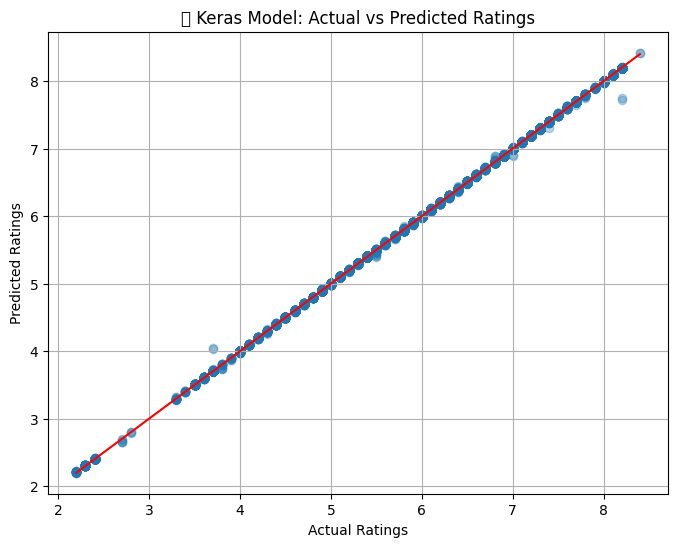

In [ ]:
# Predict ratings
y_pred = model.predict(X_test_proc).flatten()

# Optional: Compare predictions to actuals
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("🎬 Keras Model: Actual vs Predicted Ratings")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

Loss & MAE Curves (Over Epochs)

- See if the model is overfitting, underfitting, or training well.

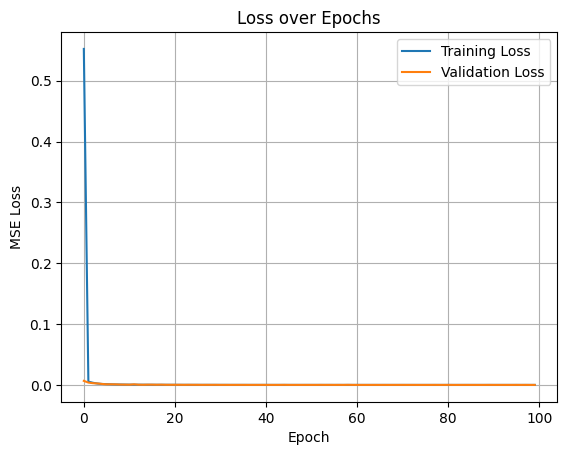

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Extract history
history_dict = history.history
# Create DataFrame
metrics_df3M = pd.DataFrame({
    'Epoch': range(1, len(history_dict['loss']) + 1),
    'Train Loss': history_dict['loss'],
    'Val Loss': history_dict['val_loss'],
    'Train MAE': history_dict['mae'],
    'Val MAE': history_dict['val_mae']
})

# Print table
print(metrics_df3M.head(10))  # or .tail(), or .to_string() for full view

   Epoch  Train Loss  Val Loss  Train MAE   Val MAE
0      1    0.552346  0.006690   0.149329  0.042661
1      2    0.005385  0.003893   0.038581  0.037353
2      3    0.003559  0.002888   0.038014  0.036067
3      4    0.002299  0.002443   0.032022  0.035012
4      5    0.001594  0.001597   0.026840  0.026950
5      6    0.001272  0.001022   0.023874  0.021857
6      7    0.000995  0.001049   0.021103  0.022564
7      8    0.000772  0.000955   0.018766  0.023226
8      9    0.000675  0.000614   0.017696  0.015154
9     10    0.000553  0.000573   0.015671  0.017669


Residuals Plot (Prediction Error)

- helps to spot bias, heteroskedasticity, or other modeling problems.
- x-axis: your model’s predicted values
- y-axis: the residuals, which are true - predicted

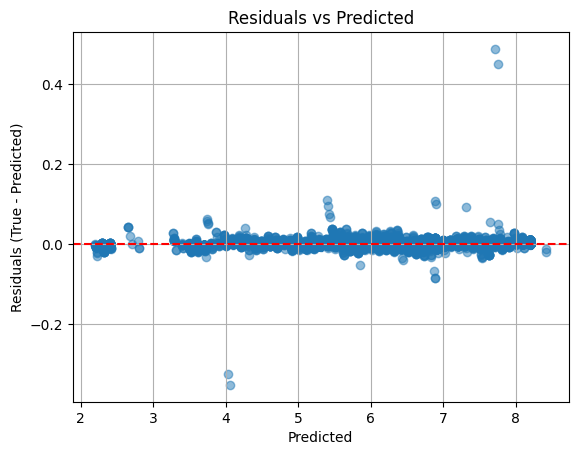

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals (True - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()

Conclusion: The Residuals hover aroung y=0 but many are below it. This could suggest no over/under-prediction. But the fact it is below 0 suggest the model might by over/underpredicting.

Mean residual: 0.0027689378327372793
Mean true value: 6.834139072351769
Mean predicted: 6.83137


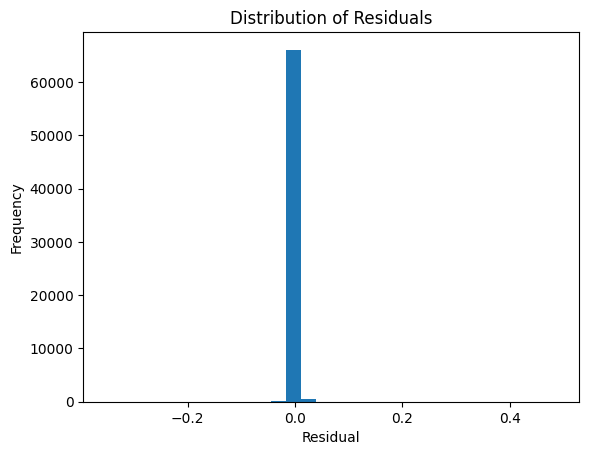

In [ ]:
print("Mean residual:", (y_test - y_pred).mean())
print("Mean true value:", y_test.mean())
print("Mean predicted:", y_pred.mean())
plt.hist(residuals, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

The model prediction is often .01 off the true

ROC Curve (One vs All)

#Testing Predictions

Use the extracted Robin Hood Data to test

In [ ]:
filtered_df3M2 = df3M[df3M['originalTitle'] == 'The Ring']
filtered_df3M2.drop(columns=['averageRating']) #removing the rating column before using it to rest the model.


,tconst,originalTitle,runtimeMinutes,genre,category,region,primaryName,primaryProfessionSplit,knownForTitleSplit
1162956,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162957,tt0018328,The Ring,89,Sport,actress,FR,Carl Brisson,archive_footage,tt0018328
1162958,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162959,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162960,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
...,...,...,...,...,...,...,...,...,...
1516335,tt0018328,The Ring,89,Drama,actress,None,Lillian Hall-Davis,actress,tt0018328
1516336,tt0018328,The Ring,89,Drama,actor,None,Lillian Hall-Davis,actress,tt0018328
1516337,tt0018328,The Ring,89,Drama,director,None,Lillian Hall-Davis,actress,tt0018328
1516338,tt0018328,The Ring,89,Drama,writer,None,Lillian Hall-Davis,actress,tt0018328


In [ ]:
new_movie_TheRing3M = filtered_df3M2[["originalTitle","category", "runtimeMinutes", "genre", "region", "primaryName"]]

new_movie_proc3M= preprocessor.transform(new_movie_TheRing3M)
rating_pred3M = model.predict(new_movie_proc3M)

print(f"🎬 Predicted rating: {rating_pred3M[0][0]:.2f}")

362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
🎬 Predicted rating: 6.09


This is a perfect prediction!!

Webscrape to get new movie data

In [ ]:
import pandas as pd

# Create IMDb access object
ia = IMDb()

# Search for a movie
movies = ia.search_movie("From the World of John Wick: Ballerina")
movie = movies[0]  # Take first match

# Fetch full data
ia.update(movie)

# Convert to DataFrame
df_test = pd.DataFrame([{
    "title": movie.get('title'),
    "year": movie.get('year'),
    "rating": movie.get('rating'),
    "genres": movie.get('genres'),
    "directors": [d['name'] for d in movie.get('directors', [])],
    "cast": [a['name'] for a in movie.get('cast', [])[:5]]  # top 5 cast
}])

print(df_test)

       title  year rating genres directors cast
0  Ballerina  2025   None   None        []   []


In [ ]:
new_movie = pd.DataFrame([{
    "originalTitle": "From the World of John Wick: Ballerina",
    "category": "actress",
    "titleType": "movie",
    "runtimeMinutes": 124,
    "genre": "Action",
    "region": "US",
    "primaryName": "Ana de Armas"
},{
    "originalTitle": "From the World of John Wick: Ballerina",
    "category": "actor",
    "titleType": "movie",
    "runtimeMinutes": 124,
    "genre": "Thriller",
    "region": "US",
    "primaryName": "Keanu Reeves"
},{
    "originalTitle": "From the World of John Wick: Ballerina",
    "category": "actor",
    "titleType": "movie",
    "runtimeMinutes": 124,
    "genre": "Action",
    "region": "US",
    "primaryName": "Ian McShane"
},{
    "originalTitle": "From the World of John Wick: Ballerina",
     "category": "actress",
    "titleType": "movie",
    "runtimeMinutes": 124,
    "genre": "Thriller",
    "region": "US",
    "primaryName": "Anjelica Huston"
}])
new_movie_proc = preprocessor.transform(new_movie)
predicted_rating = model.predict(new_movie_proc)
print(f"🎯 Predicted Rating: {predicted_rating[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
🎯 Predicted Rating: 6.22


In [ ]:
loaded_model = keras.models.load_model("//Users/amberortiz/Downloads/my_3Mopt_model.keras")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [ ]:
new_movie_spellbound = pd.DataFrame([{
    "originalTitle": "Spellbound",
    "titleType": "movie",
    "runtimeMinutes": 71,
    "genre": "Psychological Drama",
    "region": "US",
    "primaryName": "Ingrid Bergman"
},{
    "originalTitle": "Spellbound",
    "titleType": "movie",
    "runtimeMinutes": 71,
    "genre": "Film Noir",
    "region": "US",
    "primaryName": "Gregory Peck"
},{
    "originalTitle": "Spellbound",
    "titleType": "movie",
    "runtimeMinutes": 71,
    "genre": "Film Noir",
    "region": "US",
    "primaryName": "Alfred Hitchcock"
}])
new_movie_proc = preprocessor.transform(new_movie_spellbound)
predicted_rating = loaded_model.predict(new_movie_proc)
print(f"🎯 Predicted Rating: {predicted_rating[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
🎯 Predicted Rating: 5.65


import numpy as np
from sklearn.metrics import mean_squared_error

def permutation_importance(model, X_val, y_val, metric=mean_squared_error):
    baseline = metric(y_val, model.predict(X_val))
    importances = []

    for i in range(X_val.shape[1]):
        X_permuted = X_val.copy()
        X_permuted[:, i] = np.random.permutation(X_permuted[:, i])
        permuted_score = metric(y_val, model.predict(X_permuted))
        importance = permuted_score - baseline
        importances.append(importance)

    return np.array(importances)

importances = permutation_importance(model, X_test_proc, y_test)
for i, imp in enumerate(importances):
    print(f"{i}: Importance = {imp:.4f}")

#Appendix:

Testing the optimization options for keras model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# Define parameter grids to test
neuron_options = [(256, 64), (512, 128)]
activation_options = ['relu', 'gelu']
optimizer_options = ['adam', 'rmsprop', 'AdamW', 'Nadam']
batch_size_options = [64, 128, 256, 512]
epochs = 100  # fixed: should be an integer, not a list

In [ ]:
# Track best model
best_mae = float('inf')
best_params = None
best_model = None
best_history = None


In [ ]:
# Loop over all hyperparameter combinations
for neurons in neuron_options:
    for activation in activation_options:
        for optimizer_name in optimizer_options:
            for batch_size in batch_size_options:
                print(f"\n🔧 Training: neurons={neurons}, activation={activation}, optimizer={optimizer_name}, batch_size={batch_size}")

                # Map optimizer name to actual object
                if optimizer_name == 'adam':
                    optimizer = optimizers.Adam()
                elif optimizer_name == 'rmsprop':
                    optimizer = optimizers.RMSprop()
                elif optimizer_name == 'Nadam':
                    optimizer = optimizers.Nadam()
                elif optimizer_name == 'AdamW':
                    optimizer = optimizers.AdamW()
                else:
                    raise ValueError(f"Unsupported optimizer: {optimizer_name}")

                # Build model
                model = tf.keras.Sequential([
                    layers.Dense(neurons[0], activation=activation, input_shape=(X_train_proc.shape[1],)),
                    layers.Dense(neurons[1], activation=activation),
                    layers.Dense(1)
                ])

                model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

                # Train model
                history = model.fit(
                    X_train_proc, y_train,
                    validation_data=(X_test_proc, y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1
                )

                # Evaluate
                preds = model.predict(X_test_proc).flatten()
                mae = mean_absolute_error(y_test, preds)
                print(f"📉 MAE: {mae:.4f}")

                # Save best model
                if mae < best_mae:
                    best_mae = mae
                    best_params = (neurons, activation, optimizer_name, batch_size)
                    best_model = model
                    best_history = history

# Output best result
print(f"\n✅ Best MAE: {best_mae:.4f} with:")
print(f"   Neurons: {best_params[0]}")
print(f"   Activation: {best_params[1]}")
print(f"   Optimizer: {best_params[2]}")
print(f"   Batch Size: {best_params[3]}")

# Plot best model's loss curve
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Best Model Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()



🔧 Training: neurons=(256, 64), activation=relu, optimizer=adam, batch_size=64


/Users/amberortiz/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 1.4491 - mae: 0.3594 - val_loss: 0.0112 - val_mae: 0.0743
Epoch 2/100
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0088 - mae: 0.0650 - val_loss: 0.0059 - val_mae: 0.0574
Epoch 3/100
4174/4174 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.0051 - mae: 0.0510 - val_loss: 0.0031 - val_mae: 0.0384
Epoch 4/100
3036/4174 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0034 - mae: 0.0419

1m or 500k results

Training: neurons=(256, 64), activation=relu, optimizer=adam, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0075

🔧 Training: neurons=(256, 64), activation=relu, optimizer=adam, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0065

🔧 Training: neurons=(256, 64), activation=relu, optimizer=adam, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0072

🔧 Training: neurons=(256, 64), activation=relu, optimizer=adam, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0085

🔧 Training: neurons=(256, 64), activation=relu, optimizer=rmsprop, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0358

🔧 Training: neurons=(256, 64), activation=relu, optimizer=rmsprop, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0390

🔧 Training: neurons=(256, 64), activation=relu, optimizer=rmsprop, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0548

🔧 Training: neurons=(256, 64), activation=relu, optimizer=rmsprop, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0882

🔧 Training: neurons=(256, 64), activation=relu, optimizer=AdamW, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0089

🔧 Training: neurons=(256, 64), activation=relu, optimizer=AdamW, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0108

🔧 Training: neurons=(256, 64), activation=relu, optimizer=AdamW, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0156

🔧 Training: neurons=(256, 64), activation=relu, optimizer=AdamW, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0160

🔧 Training: neurons=(256, 64), activation=relu, optimizer=Nadam, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0103

🔧 Training: neurons=(256, 64), activation=relu, optimizer=Nadam, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0194

🔧 Training: neurons=(256, 64), activation=relu, optimizer=Nadam, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0122

🔧 Training: neurons=(256, 64), activation=relu, optimizer=Nadam, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0205

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=adam, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
📉 MAE: 0.0048

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=adam, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0092

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=adam, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0081

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=adam, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0064

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=rmsprop, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0199

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=rmsprop, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0296

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=rmsprop, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0427

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=rmsprop, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0535

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=AdamW, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0058

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=AdamW, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0037

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=AdamW, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0076

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=AdamW, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0083

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=Nadam, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0043

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=Nadam, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0116

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=Nadam, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0217

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=Nadam, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0059

🔧 Training: neurons=(512, 128), activation=relu, optimizer=adam, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0075

🔧 Training: neurons=(512, 128), activation=relu, optimizer=adam, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
📉 MAE: 0.0119

🔧 Training: neurons=(512, 128), activation=relu, optimizer=adam, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
📉 MAE: 0.0088

🔧 Training: neurons=(512, 128), activation=relu, optimizer=adam, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0187

🔧 Training: neurons=(512, 128), activation=relu, optimizer=rmsprop, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)